<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/100Resistores_680kOhms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [465]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats


In [466]:
#Valor nominal ou do fabricante
R_ref= 680.0 #(kΩ)

In [467]:
##Exemplo: Medidas dos 100 resistores de 680 ± 5% (kΩ)
array_GR01 = [671, 667, 673, 675, 675, 671, 678, 668, 668, 672, 670, 669, 670, 677, 671, 674, 666, 676, 673, 667]#(k ohms)
array_GR02 = [673, 671, 671, 677, 678, 669, 670, 669, 674, 670, 672, 680, 675, 682, 669, 671, 673, 673, 669, 668]#(k ohms)
array_GR03 = [673, 674, 672, 675, 678, 679, 670, 674, 670, 679, 672, 676, 671, 674, 671, 670, 675, 674, 669, 672]#(k ohms)
array_GR04 = [668, 673, 673, 669, 672, 667, 668, 671, 676, 671, 674, 678, 672, 678, 675, 676, 673, 669, 676, 675]#(k ohms)
array_GR05 = [677, 679, 672, 678, 672, 675, 676, 673, 668, 669, 676, 675, 669, 664, 674, 666, 676, 670, 674, 665]#(k ohms)
array_100 = array_GR01+array_GR02+array_GR03+array_GR04+array_GR05 


In [468]:
def compatibilidade(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-np.mean(array_100))/ec
  if d<=2.0:
    print("Compatível", d, ec, abs(np.mean(grupo)-np.mean(array_100)))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,ec, abs(np.mean(grupo)-np.mean(array_100)))
  else:
    print("Incompatível", d,ec,abs(np.mean(grupo)-np.mean(array_100))
  return(d)

In [469]:
def compatibilidadeRef(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  #egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  #ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-R_ref)/e100
  if d<=2.0:
    print("Compatível", d, e100, abs(np.mean(grupo)-R_ref))
  if d > 2.0 and d < 3.0:
    print("Inconclusivo", d,e100, abs(np.mean(grupo)-R_ref))
  else:
    print("Incompatível", d,e100),abs(np.mean(grupo)-R_ref)
  return(d)

Conjunto completo de valores de resistências (100):

In [470]:
print ("Conjunto completo:",array_100, "N=", len(array_100))
amplitude_100=(np.max(array_100)-np.min(array_100))
print ( "Valor mínimo: {}".format( np.min(array_100) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_100) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_100 ) ,"(kΩ)")

Conjunto completo: [671, 667, 673, 675, 675, 671, 678, 668, 668, 672, 670, 669, 670, 677, 671, 674, 666, 676, 673, 667, 673, 671, 671, 677, 678, 669, 670, 669, 674, 670, 672, 680, 675, 682, 669, 671, 673, 673, 669, 668, 673, 674, 672, 675, 678, 679, 670, 674, 670, 679, 672, 676, 671, 674, 671, 670, 675, 674, 669, 672, 668, 673, 673, 669, 672, 667, 668, 671, 676, 671, 674, 678, 672, 678, 675, 676, 673, 669, 676, 675, 677, 679, 672, 678, 672, 675, 676, 673, 668, 669, 676, 675, 669, 664, 674, 666, 676, 670, 674, 665] N= 100
Valor mínimo: 664 (kΩ)
Valor máximo: 682 (kΩ)
Amplitude: 18 (kΩ)


In [471]:
#Calculo da média
N100=len(array_100)
media_100=(np.sum(array_100)/N100)
vmin = np.min(array_100)
vmax = np.max(array_100)
print("média do conjunto de 100 resistores: {}".format( (media_100)),"(kΩ)")

média do conjunto de 100 resistores: 672.55 (kΩ)


In [472]:
#Usando o NumPy
np.mean( array_100 )

672.55

In [473]:
print("média do conjunto de 100 resistores: {}".format(np.mean( array_100 )),"(kΩ)")



média do conjunto de 100 resistores: 672.55 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Conjunto Completo de 100 Resistores')

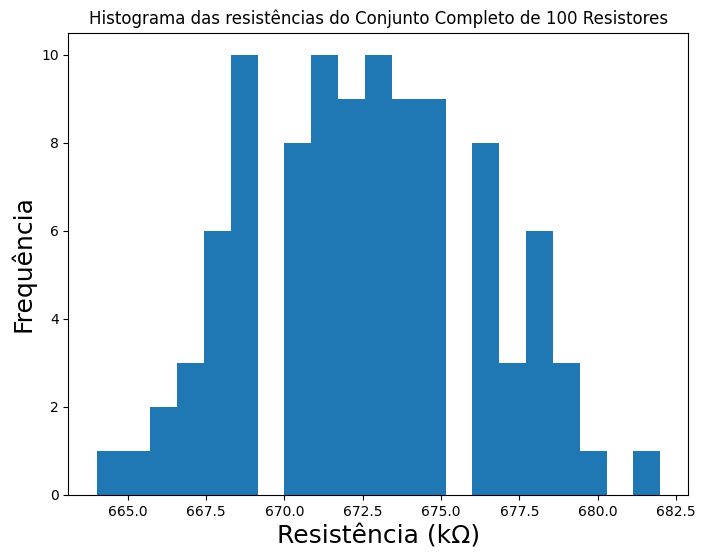

In [474]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_100, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Conjunto Completo de 100 Resistores', fontsize=12 )




Variância e desvio Padrão usando o NumPY:

In [475]:
var_100 = np.var( array_100, ddof=0 )
print ( "Variância do conj. de 100 resistores: {}".format(var_100),"(k^2Ω)" )
print ( "Desvio Padrao do conj. de 100 resistores: {}".format(np.sqrt(var_100)),"(kΩ)" )
sigma_m100 = np.std( array_100, ddof=0 )/np.sqrt(N100)
print ( "Erro da média do conj. de 100: {}".format(np.std( array_100, ddof=1 )/np.sqrt(N100)),"(kΩ)" )

Variância do conj. de 100 resistores: 13.147500000000004 (k^2Ω)
Desvio Padrao do conj. de 100 resistores: 3.625948151863179 (kΩ)
Erro da média do conj. de 100: 0.36442150087917474 (kΩ)


Estimativa Padrão dos 100 resistores:

In [476]:
print ( "R100 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_100 ), 1 ), np.round( sigma_m100, 1 ) ) )


R100 = 672.6 ± 0.4 (kΩ)


Grupo 01 de valores de resistências:

In [477]:
amplitude_GR01=(np.max(array_GR01)-np.min(array_GR01))
print ( "Valor mínimo: {}".format( np.min(array_GR01) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR01) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR01 ) ,"(kΩ)")

Valor mínimo: 666 (kΩ)
Valor máximo: 678 (kΩ)
Amplitude: 12 (kΩ)


In [478]:
#Usando o NumPy
np.mean( array_GR01 )

671.55

In [479]:
#Calculo da média
N1_20=len(array_GR01)
media_GR01=(np.sum(array_GR01)/N1_20)
vmin = np.min(array_GR01)
vmax = np.max(array_GR01)

print("média do conjunto de 20 resistores do Grupo 01: {}".format( (media_GR01)),"(kΩ)")

média do conjunto de 20 resistores do Grupo 01: 671.55 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Grupo 01 de 20 Resistores')

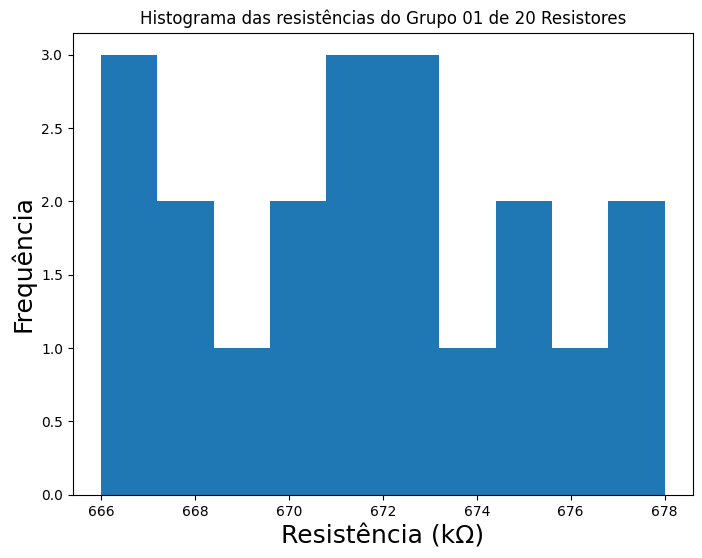

In [480]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR01, bins=10, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 01 de 20 Resistores', fontsize=12 )


In [481]:
var_gr1 = np.var( array_GR01, ddof=0 )
print ( "Variância do Grupo 01: {}".format(var_gr1), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 01: {}".format(np.sqrt(var_gr1)),"(kΩ)" )
sigma_m1 = np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)
print ( "Erro da média do Grupo 01: {}".format(np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)),"(kΩ)" )

Variância do Grupo 01: 11.7475 (k^2Ω)
Desvio Padrao do do Grupo 01: 3.427462618322773 (kΩ)
Erro da média do Grupo 01: 0.7863138518964361 (kΩ)


Estimativa Padrão GR01:

In [482]:
print ( "R1 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR01 ), 1 ), np.round( sigma_m1, 1 ) ) )


R1 = 671.6 ± 0.8 (kΩ)


Grupo 02 de valores de resistências:

In [483]:
#Calculo da média
N2_20=len(array_GR02)
media_GR02=(np.sum(array_GR02)/N2_20)
vmin = np.min(array_GR02)
vmax = np.max(array_GR02)
amplitude_GR02=(np.max(array_GR02)-np.min(array_GR02))
print ( "Valor mínimo: {}".format( np.min(array_GR02) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR02) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR02 ) ,"(kΩ)")
print("média do conjunto de 20 resistores do Grupo 02: {}".format( (media_GR02)),"(kΩ)")

Valor mínimo: 668 (kΩ)
Valor máximo: 682 (kΩ)
Amplitude: 14 (kΩ)
média do conjunto de 20 resistores do Grupo 02: 672.7 (kΩ)


In [484]:
#Usando o NumPy
np.mean( array_GR02 )

672.7

Text(0.5, 1.0, 'Histograma das resistências do Grupo 02 de 20 Resistores')

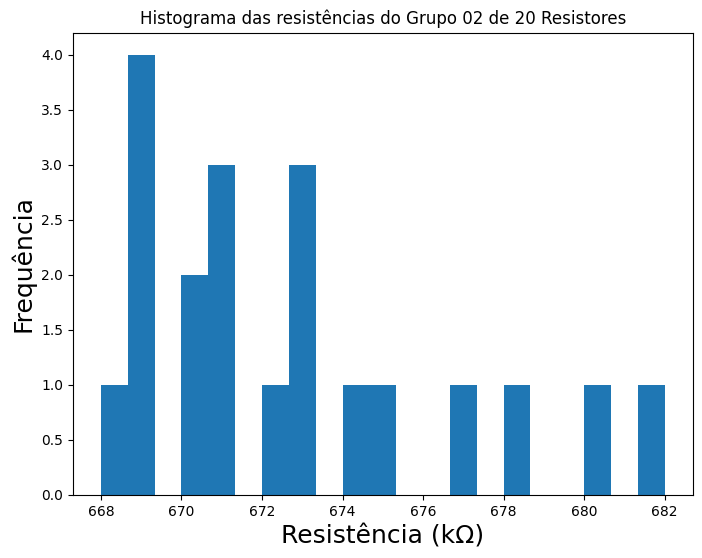

In [485]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR02, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 02 de 20 Resistores', fontsize=12 )


In [486]:
var_gr2 = np.var( array_GR02, ddof=0 )
print ( "Variância do Grupo 02: {}".format(var_gr2), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 02: {}".format(np.sqrt(var_gr2)),"(kΩ)" )
sigma_m2 = np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)
print ( "Erro da média do Grupo 02: {}".format(np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)),"(kΩ)" )

Variância do Grupo 02: 14.710000000000003 (k^2Ω)
Desvio Padrao do do Grupo 02: 3.8353617821530217 (kΩ)
Erro da média do Grupo 02: 0.879892337911741 (kΩ)


Estimativa Padrão GR02:

In [487]:
print ( "R2 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR02 ), 1 ), np.round( sigma_m2, 1 ) ) )


R2 = 672.7 ± 0.9 (kΩ)


Grupo 03 de valores de resistências:

In [488]:
#Calculo da média
N3_20=len(array_GR03)
media_GR03=(np.sum(array_GR03)/N3_20)
vmin = np.min(array_GR03)
vmax = np.max(array_GR03)
amplitude_GR03=(np.max(array_GR03)-np.min(array_GR03))
print ( "Valor mínimo: {}".format( np.min(array_GR03) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR03) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR03 ),"(kΩ)" )
print("média do conjunto de 20 resistores do Grupo 03: {}".format( (media_GR03)),"(kΩ)")

Valor mínimo: 669 (kΩ)
Valor máximo: 679 (kΩ)
Amplitude: 10 (kΩ)
média do conjunto de 20 resistores do Grupo 03: 673.4 (kΩ)


In [489]:
#Usando o NumPy
np.mean( array_GR03 )

673.4

Text(0.5, 1.0, 'Histograma das resistências do Grupo 03 de 20 Resistores')

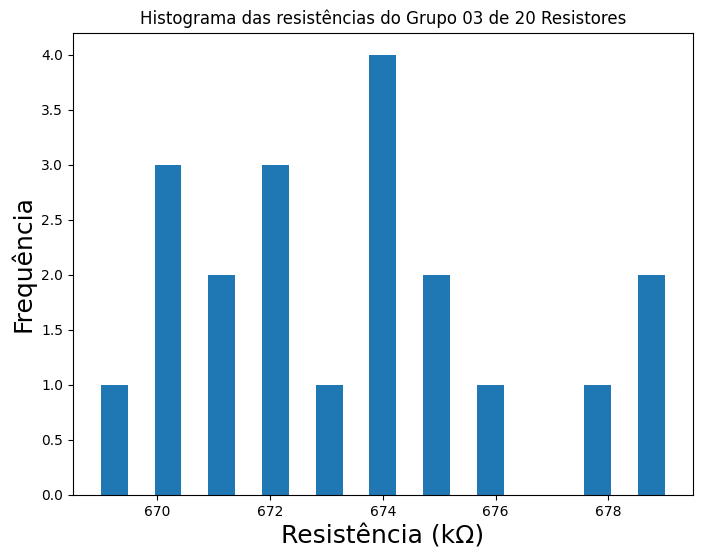

In [490]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR03, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 03 de 20 Resistores', fontsize=12 )


In [491]:
var_gr3 = np.var( array_GR03, ddof=0 )
print ( "Variância do Grupo 03: {}".format(var_gr3), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 03: {}".format(np.sqrt(var_gr3)),"(kΩ)" )
sigma_m3 = np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)
print ( "Erro da média do Grupo 03: {}".format(np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)),"(kΩ)" )

Variância do Grupo 03: 8.439999999999998 (k^2Ω)
Desvio Padrao do do Grupo 03: 2.9051678092667896 (kΩ)
Erro da média do Grupo 03: 0.6664912049800726 (kΩ)


Estimativa Padrão GR03:

In [492]:
print ( "R3 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR03 ), 1 ), np.round( sigma_m3, 1 ) ) )


R3 = 673.4 ± 0.7 (kΩ)


Grupo 04 de valores de resistências:

In [493]:
#Calculo da média
N4_20=len(array_GR04)
media_GR04=(np.sum(array_GR04)/N4_20)
vmin = np.min(array_GR04)
vmax = np.max(array_GR04)
amplitude_GR04=(np.max(array_GR04)-np.min(array_GR04))
print ( "Valor mínimo: {}".format( np.min(array_GR04) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR04) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR04 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 04: {}".format( (media_GR04)),"(kΩ)")

Valor mínimo: 667 (kΩ)
Valor máximo: 678 (kΩ)
Amplitude: 11 (kΩ)
média do conjunto de 20 resistências do Grupo 04: 672.7 (kΩ)


In [494]:
#Usando o NumPy
np.mean( array_GR04 )

672.7

Text(0.5, 1.0, 'Histograma das resistências do Grupo 04 de 20 Resistores')

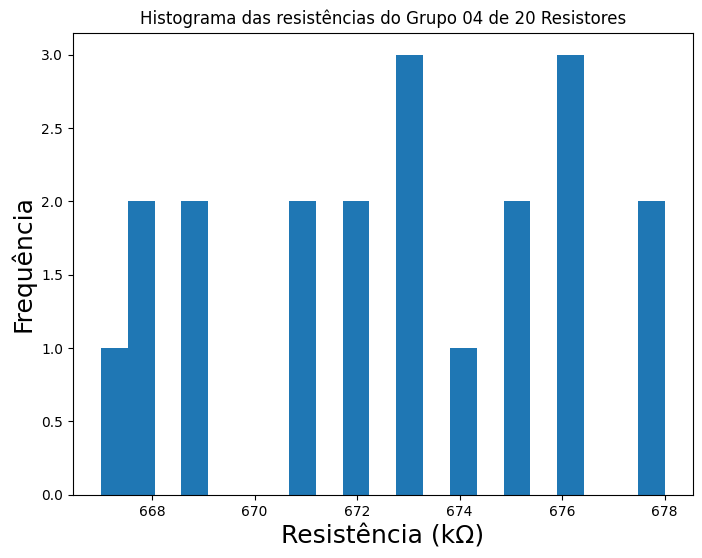

In [495]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR04, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 04 de 20 Resistores', fontsize=12 )


In [496]:
var_gr4 = np.var( array_GR04, ddof=0 )
print ( "Variância do Grupo 04: {}".format(var_gr4), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 04: {}".format(np.sqrt(var_gr4)),"(kΩ)" )
sigma_m4 = np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)
print ( "Erro da média do Grupo 04: {}".format(np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)),"(kΩ)" )

Variância do Grupo 04: 10.61 (k^2Ω)
Desvio Padrao do do Grupo 04: 3.257299494980466 (kΩ)
Erro da média do Grupo 04: 0.7472757540771539 (kΩ)


Estimativa Padrão GR04:

In [497]:
print ( "R4 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR04 ), 1 ), np.round( sigma_m4, 1 ) ) )


R4 = 672.7 ± 0.7 (kΩ)


Grupo 05 de valores de resistências:


In [498]:
#Calculo da média
N5_20=len(array_GR05)
media_GR05=(np.sum(array_GR05)/N5_20)
vmin = np.min(array_GR05)
vmax = np.max(array_GR05)
amplitude_GR05=(np.max(array_GR05)-np.min(array_GR05))
print ( "Valor mínimo: {}".format( np.min(array_GR05) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR05) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR05 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 05: {}".format( (media_GR05)),"(kΩ)")

Valor mínimo: 664 (kΩ)
Valor máximo: 679 (kΩ)
Amplitude: 15 (kΩ)
média do conjunto de 20 resistências do Grupo 05: 672.4 (kΩ)


In [499]:
#Usando o NumPy
np.mean( array_GR05 )

672.4

Text(0.5, 1.0, 'Histograma das resistências do Grupo 05 de 20 Resistores')

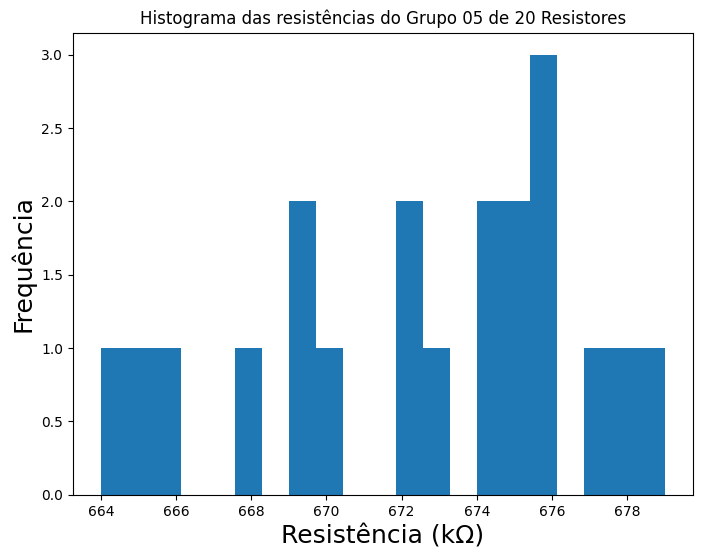

In [500]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR05, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 05 de 20 Resistores', fontsize=12 )

In [501]:
var_gr5 = np.var( array_GR05, ddof=1 )
print ( "Variância do Grupo 05: {}".format(var_gr5), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 05: {}".format(np.sqrt(var_gr5)),"(kΩ)" )
sigma_m5 = np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)
print ( "Erro da média do Grupo 05: {}".format(np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)),"(kΩ)" )

Variância do Grupo 05: 19.410526315789472 (k^2Ω)
Desvio Padrao do do Grupo 05: 4.405737885506748 (kΩ)
Erro da média do Grupo 05: 0.9851529403039274 (kΩ)


Estimativa Padrão GR05:


In [502]:
print ( "R5 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR05 ), 1 ), np.round( sigma_m5, 1 ) ) )


R5 = 672.4 ± 1.0 (kΩ)


Média das Médias:

In [503]:
array_GRM = [np.mean( array_GR01 ),np.mean( array_GR02 ),np.mean( array_GR03 ),np.mean( array_GR04),np.mean( array_GR05)] #kΩ

In [504]:
N=len(array_GRM)
media_GRM=(np.sum(array_GRM)/N)
vmin = np.min(array_GRM)
vmax = np.max(array_GRM)
amplitude_GRM=(np.max(array_GRM)-np.min(array_GRM))
print ( "Valor mínimo: {}".format( np.min(array_GRM) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GRM) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GRM ),"(kΩ)" )
print("média do conjunto das médias das resistências: {}".format( (media_GRM)),"(kΩ)")

Valor mínimo: 671.55 (kΩ)
Valor máximo: 673.4 (kΩ)
Amplitude: 1.8500000000000227 (kΩ)
média do conjunto das médias das resistências: 672.5500000000001 (kΩ)


In [505]:
#Usando o NumPy
np.mean( array_GRM )

672.5500000000001

Text(0.5, 1.0, 'Histograma das resistências do grupo das médias')

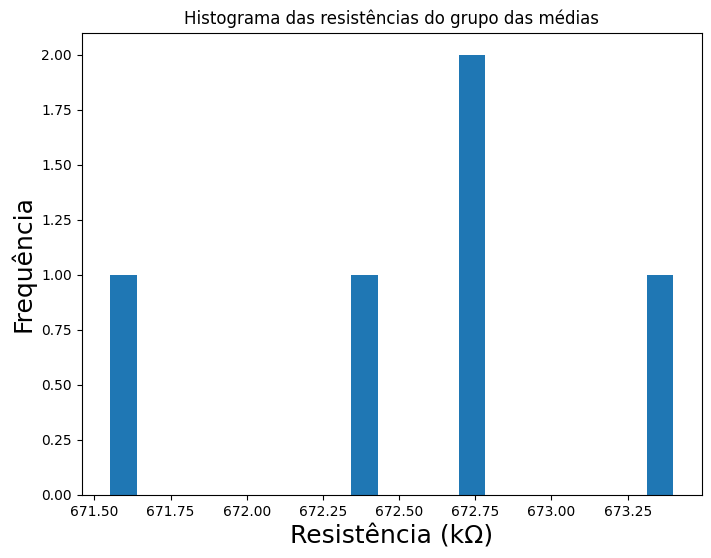

In [506]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GRM, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do grupo das médias', fontsize=12 )

In [507]:
var_grm = np.var( array_GRM, ddof=1 )
print ( "Variância do Grupo das médias: {}".format(var_grm), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo das médias: {}".format(np.sqrt(var_grm)),"(kΩ)" )
sigma_m = np.std( array_GRM, ddof=1 )/np.sqrt(N)
print ( "Erro da média do Grupo das médias: {}".format(np.std( array_GRM, ddof=1 )/np.sqrt(N)),"(kΩ)" )

Variância do Grupo das médias: 0.44750000000002155 (k^2Ω)
Desvio Padrao do do Grupo das médias: 0.6689544080129987 (kΩ)
Erro da média do Grupo das médias: 0.299165506033039 (kΩ)


Estimativa padrão do grupo das médias:

In [508]:
print ( "RM = {:.2f} ± {:.2f} (kΩ)".format( np.round( np.mean( array_GRM ), 2 ), np.round( sigma_m, 2 ) ) )


RM = 672.55 ± 0.30 (kΩ)


Desvio Padrão do conjunto com 100 resistores:


In [509]:
sigma_L_p = np.std( array_100, ddof=0 )
print ( "Desvio padrão populacional (kΩ) = {}".format(sigma_L_p  ) )

sigma_L_a = np.std( array_100, ddof=1 )
print ( "Desvio padrão amostral (kΩ) = {}".format(sigma_L_a  ) )



Desvio padrão populacional (kΩ) = 3.625948151863179
Desvio padrão amostral (kΩ) = 3.6442150087917473


Erro Relativo:

In [510]:
erro_relativo100 = sigma_m100 / media_100 
print ( "Erro relativo das medidas dos 100 resistores = {}".format( erro_relativo100* 100),"%(kΩ)" )
erro_relativo1 = sigma_m1/ media_GR01
print ( "Erro relativo das medidas do grupo 1 = {}".format( erro_relativo1*100 ),"%(kΩ)" )
erro_relativo2 = sigma_m2/ media_GR02
print ( "Erro relativo das medidas do grupo 2 = {}".format( erro_relativo2 *100),"%(kΩ)" )
erro_relativo3 = sigma_m3/ media_GR03
print ( "Erro relativo das medidas do grupo 3 = {}".format( erro_relativo3*100 ),"%(kΩ)" )
erro_relativo4 = sigma_m4/ media_GR04
print ( "Erro relativo das medidas do grupo 4 = {}".format( erro_relativo4*100 ),"%(kΩ)" )
erro_relativo5 = sigma_m5/ media_GR05
print ( "Erro relativo das medidas do grupo 5 = {}".format( erro_relativo5*100 ),"%(kΩ)" )
erro_relativoM = sigma_m/ media_GRM
print ( "Erro relativo das medidas do grupo das médias = {}".format( erro_relativoM*100 ),"%(kΩ)" )

Erro relativo das medidas dos 100 resistores = 0.05391343620345223 %(kΩ)
Erro relativo das medidas do grupo 1 = 0.11708939794452179 %(kΩ)
Erro relativo das medidas do grupo 2 = 0.13080010969403016 %(kΩ)
Erro relativo das medidas do grupo 3 = 0.0989740429135837 %(kΩ)
Erro relativo das medidas do grupo 4 = 0.11108603449935392 %(kΩ)
Erro relativo das medidas do grupo 5 = 0.14651292984888867 %(kΩ)
Erro relativo das medidas do grupo das médias = 0.04448226987332376 %(kΩ)


Razão entre os erros das médias de cada grupo e o erro da média do conjunto completo:

In [511]:
erro_r1 = sigma_m1/sigma_m100 
print ( "Razão do sigma_m1/sigma_m100   = {}".format( np.round(erro_r1 ),2) )

erro_r2 = sigma_m2/sigma_m100  
print ( "Razão do sigma_m2/sigma_m100   = {}".format( np.round(erro_r2 ) ,2))

erro_r3 = sigma_m3/sigma_m100 
print ( "Razão do sigma_m3/sigma_m100   = {}".format(np.round( erro_r3 ),2 ))

erro_r4 = sigma_m4/sigma_m100 
print ( "Razão do sigma_m4/sigma_m100   = {}".format( erro_r4 ) )

erro_r5 = sigma_m5/sigma_m100 
print ( "Razão do sigma_m5/sigma_m100   = {}".format( np.round(erro_r5 ),2) )

Razão do sigma_m1/sigma_m100   = 2.0
Razão do sigma_m2/sigma_m100   = 2.0
Razão do sigma_m3/sigma_m100   = 2.0
Razão do sigma_m4/sigma_m100   = 2.060911305897105
Razão do sigma_m5/sigma_m100   = 3.0


In [512]:
print("O grupo de 100 é ou não compatível com o R de ref.:",compatibilidadeRef(array_100))

Incompatível 20.546350052390828 0.3625948151863179
O grupo de 100 é ou não compatível com o R de ref.: 20.546350052390828


In [513]:
print("O grupo 01 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR01))

Compatível 1.1548818893357218 0.8658894119252242 1.0
O grupo 01 é  ou não compatível com o grupo de 100: 1.1548818893357218


In [514]:
print("O grupo 02 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR02))

Compatível 0.15761681427445431 0.9516751159486043 0.15000000000009095
O grupo 02 é  ou não compatível com o grupo de 100: 0.15761681427445431


In [515]:
print("O grupo 03 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR03))

Compatível 1.120279194247164 0.7587394324244584 0.8500000000000227
O grupo 03 é  ou não compatível com o grupo de 100: 1.120279194247164


In [516]:
print("O grupo 04 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR04))

Compatível 0.18059238311429338 0.830599814972035 0.15000000000009095
O grupo 04 é  ou não compatível com o grupo de 100: 0.18059238311429338


In [517]:
print("O grupo 05 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR05))

Compatível 0.14288946248448944 1.0497625044692127 0.14999999999997726
O grupo 05 é  ou não compatível com o grupo de 100: 0.14288946248448944
